# 이미지 얼굴영역만 crop

In [ ]:
!ls

data_preprocessing.ipynb  haarcascade_frontalface_default.xml  origin_img


In [ ]:
cd /content/drive/Shareddrives/goldhand

/content/drive/Shareddrives/goldhand


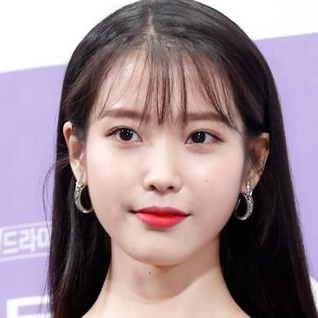

In [ ]:
# 크롭해서 이미지 저장하기
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

img = cv2.imread('./origin_img/아이유.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3,5)
for (x,y,w,h) in faces:
    imgNum=0 # 등장하는 인물이 여러명일때
    cropped = img[y - int(h / 4):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)]
    
    # 이미지를 저장
    cv2.imwrite("crop" + str(imgNum) + ".png", cropped)
    imgNum += 1

cv2_imshow(cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

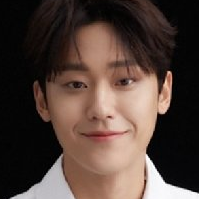

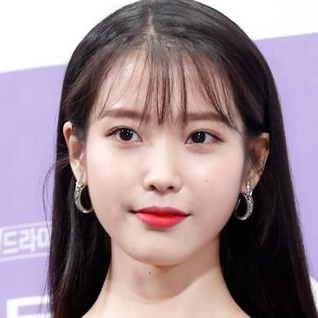

In [ ]:
# 자동화
import os
import re

origin_img_path = '/content/drive/Shareddrives/goldhand/origin_img/'
crop_img_path = '/content/drive/Shareddrives/goldhand/crop_img/'
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

oimg_list = os.listdir(origin_img_path)

for i in oimg_list:
    img = cv2.imread(origin_img_path+i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)

    for (x,y,w,h) in faces:
        imgNum=0 # 등장하는 인물이 여러명일때
        cropped = img[y - int(h / 4):y + h + int(h / 4), x - int(w / 4):x + w + int(w / 4)] # 크롭할 이미지 크기 조절
      
        # 이미지를 저장
        cv2.imwrite(crop_img_path+ re.sub('.jpeg','',i) + str(imgNum) +".png", cropped)
        imgNum += 1

    cv2_imshow(cropped)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이미지 스케치로 바꾸기

In [ ]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread('./crop_img/아이유0.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0). # x 블러가 약하면 배경의 외곽도 포함되므로 ksize를 적당히 조절
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

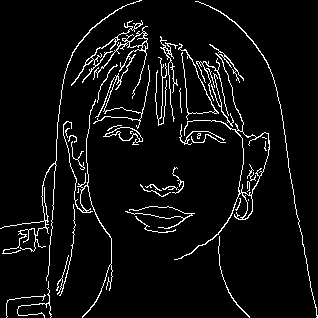

-1

In [ ]:
edged = cv2.Canny(blur, 10, 250) # minimun threshold value , maximun threshold value
cv2_imshow(edged)
cv2.waitKey(0)

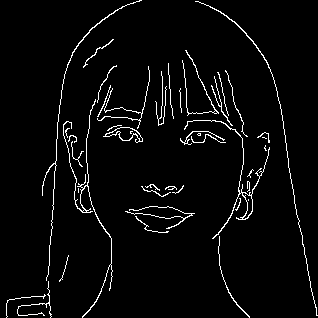

-1

In [ ]:
# 위의 이미지와 차이를 볼수 있다! 즉, 윤곽선 세부사항 이걸로 조절
edged = cv2.Canny(blur, 100, 250) # minimun threshold value , maximun threshold value
cv2_imshow(edged)
cv2.waitKey(0)

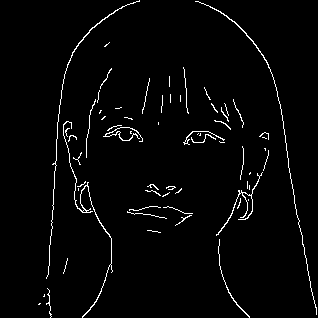

-1

In [ ]:
edged = cv2.Canny(blur, 200, 250) # minimun threshold value , maximun threshold value
cv2_imshow(edged)
cv2.waitKey(0)

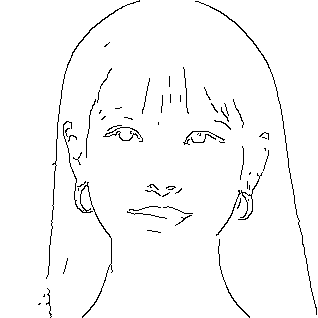

In [ ]:
# 색 반전
cv2_imshow(255-edged)

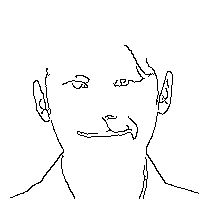

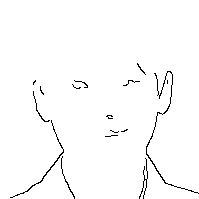

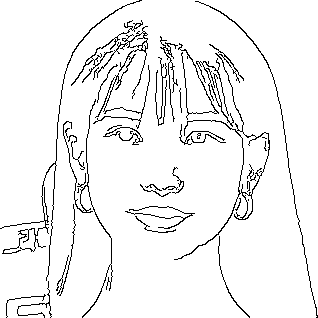

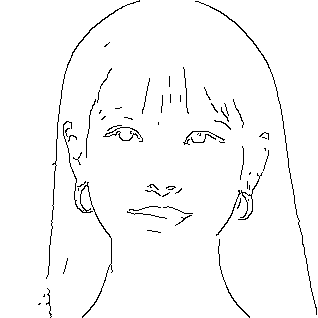

In [ ]:
# 자동화 시켜보자

crop_img_path = '/content/drive/Shareddrives/goldhand/crop_img/'
sketch_path01 = '/content/drive/Shareddrives/goldhand/sketch01/'   # 자세한 스케치
sketch_path02 = '/content/drive/Shareddrives/goldhand/sketch02/'   # 덜 자세한 스케치

for i in os.listdir(crop_img_path):
    image = cv2.imread(crop_img_path+i)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)  # x 블러가 약하면 배경의 외곽도 포함되므로 ksize를 적당히 조절
    ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

    edged = cv2.Canny(blur, 10, 250) # minimun threshold value , maximun threshold value
    edged2 = cv2.Canny(blur, 200, 250)

    #이미지 저장
    cv2.imwrite(sketch_path01 + re.sub('.png','',i) +".png", edged)
    cv2_imshow(255-edged)
    cv2.imwrite(sketch_path02 + re.sub('.png','',i) +".png", edged2)
    cv2_imshow(255-edged2)

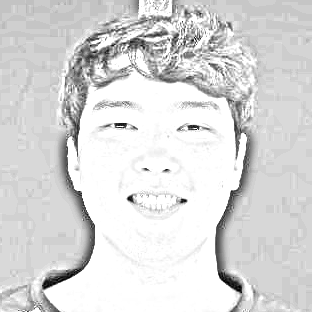

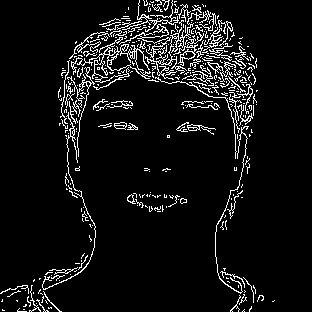

-1

In [ ]:
# 필터2

image = cv2.imread('/content/drive/Shareddrives/goldhand/newData/crop/19062421_S001_L1_E02_C70.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
inverted_image = 255 - gray_image
blurred = cv2.GaussianBlur(inverted_image, (33, 33), 0)
inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)

cv2_imshow(pencil_sketch)

edged = 255-cv2.Canny(pencil_sketch, 170, 200) # minimun threshold value , maximun threshold value
cv2_imshow(edged)
cv2.waitKey(0)